# Assignment 7
### Do any five.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import matplotlib
print(matplotlib.__file__)


/Users/yani/miniconda3/envs/py311_env/lib/python3.11/site-packages/matplotlib/__init__.py


## 1. 

- What is the expected value of a single die roll? 
- What is the expected value of rolling two dice and adding the results together?
- What is the expected winnings of any gamble in European roulette?

- Imagine you roll a die, and you record the value you get. But, if you roll a six, you roll again, and add that value. What is the expected value?
- Imagine that the process described in the last question continues until you fail to roll a six. What is the expected value of the process? (This can be tricky, you can simulate it to get an answer if you prefer. Hint: The answer is 4.2.)

## 2. 
- Compute the expected value for a uniform random variable.
- Show that $\mathbb{E}[a+bX] = a + b\mathbb{E}[X]$
- Show, by example, that $v(\mathbb{E}[X]) \neq \mathbb{E}[v(X)]$, if $v(x) \neq a+bx$. For example, try $v(y) = y^2$ or $v(y)=\sqrt{y}$ with a Bernoulli or uniform or normally distributed random variable. This can be an important thing to remember: The expectation of a transformed random variable is not the transformation of the expected value.

## 3. 
- Compute the variance for a uniform random variable.
- Show that 
$$
\mathbb{V}[X] = \mathbb{E}[X^2] - \mathbb{E}[X]^2
$$
$$
\mathbb{V}[a+bX] = b^2 \mathbb{V}[X]
$$
- Show that if $X$ is a normally distributed random variable, then $a + bX$ is distributed normally with mean $a+ b \mathbb{E}[X]$ and variance $b^2 \sigma_X^2$ 

These properties get used all the time!


## 4.

- The **covariance** of $X$ and $Y$ is
$$
\text{cov}(X,Y) = \int_{y} \int_{x} (x-\mathbb{E}[X])(y-\mathbb{E}[Y])f_{XY}(x,y) dxdy = \mathbb{E}_{XY}[ (x-\mu_X)(y-\mu_Y)]
$$
- Show that if $f_{XY}(x,y)=f_X(x)f_Y(y)$, then $\text{cov}(X,Y)=0$
- Provide an example (computation/simulation is fine) where $\text{cov}(X,Y)\approx 0$ but $f_{XY}(x,y)\neq 0$
- The covariance doesn't characterize joint random variables except in a few special cases: The covariance only captures the **linear** association between the two variables, not nonlinear associations.

## 5. 

Suppose $X$ has an expectation $\mathbb{E}[X]<\infty$ and variance $\mathbb{V}[X]<\infty$; this isn't always true, but is *usually* true
- Consider making a new variable, $\varepsilon = X - \mathbb{E}[X]$
- What's the expectation of $\varepsilon$?
- What's the variance of $\varepsilon$?
- So we can write any random variable in the form $X = \mathbb{E}[X] + \varepsilon, $ where $\mathbb{E}[\varepsilon]=0$ and $\mathbb{V}[\varepsilon] = \sigma_X^2$
- If that's true, show that we can also write any random variable in the form $X = \mathbb{E}[X] + \sigma_X \varepsilon$, where $\mathbb{E}[\varepsilon]=0$ and $\mathbb{V}[\varepsilon]=1$
- Now replace $\mathbb{E}[X]$ with $x\beta$, and the stage is set for regression models

## 6.
- Use the Taylor series expansions 
$$
F(x+h) = F(x) + hf(x) + \frac{h^2}{2}f'(x) + O(h^3)
$$ 
and 
$$
F(x-h) = F(x) - h f(x) + \frac{h^2}{2} f'(x)+ O(h^3)
$$
to show that
$$
\mathbb{E}[\hat{f}_{X,h}(x)] = \frac{F(x+h)-F(x-h)}{2h} = f(x) + O(h^2),
$$
so the **bias** of the KDE is $O(h^2)$, unlike the ECDF, for which $\mathbb{E}[\hat{F}(x)] = F(x)$.

## 7.
- Suppose $X$ and $Y$ are distributed bivariate normal. Show that if $\rho=0$, then $X$ and $Y$ are independent.
- For the multivariate normal, show that if $\Sigma$ is a diagonal matrix, then $X_1, X_2, ..., X_n$ are independent.
- For the multivariate normal, show that if $\Sigma$ is a diagonal matrix and all the $\sigma_i^2$ and all the $\mu_i$ are equal, then $X_1, X_2, ..., X_n$ are independently distributed random variables with distribution $N(\mu, \sigma^2)$

## 8.
- Open the METABRIC data. Make a histogram of 'Ratio Therapy'.
- Let treatment, $T$ be distributed binomial with parameter $p$. Then the contribution to the likelihood for each patient $i$, with $y_i = 0$ for no radiation therapy and $y_i=1$ for radiation therapy, is 
$$
p^{y_i}(1-p)^{1-y_i}
$$
- Write out the likelihood.
- Maximize the likelihood with respect to $p$. What is the MLE, $\hat{p}$?
- Bootstrap the sampling density/distribution of $\hat{p}$.

## 9.
- Open the Ames house price data. Make a KDE of 'price'. Select an appropriate distribution for modeling it, and explain why you selected it. (Hint: You might want to take a common transformation of price.)
- Derive the density for this distribution.
- Write out the likelihood.
- Maximize the likelihood. What is the MLE?
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameters.

In [2]:
ames=pd.read_csv("ames_prices.csv")

<Axes: xlabel='price', ylabel='Proportion'>

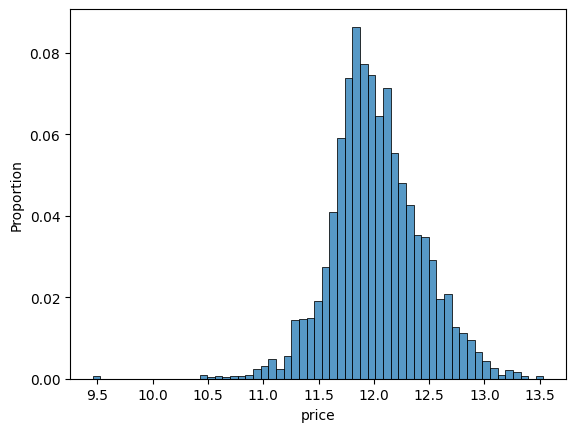

In [4]:
y = np.log( ames['price'] )
sns.histplot(y,stat='proportion')

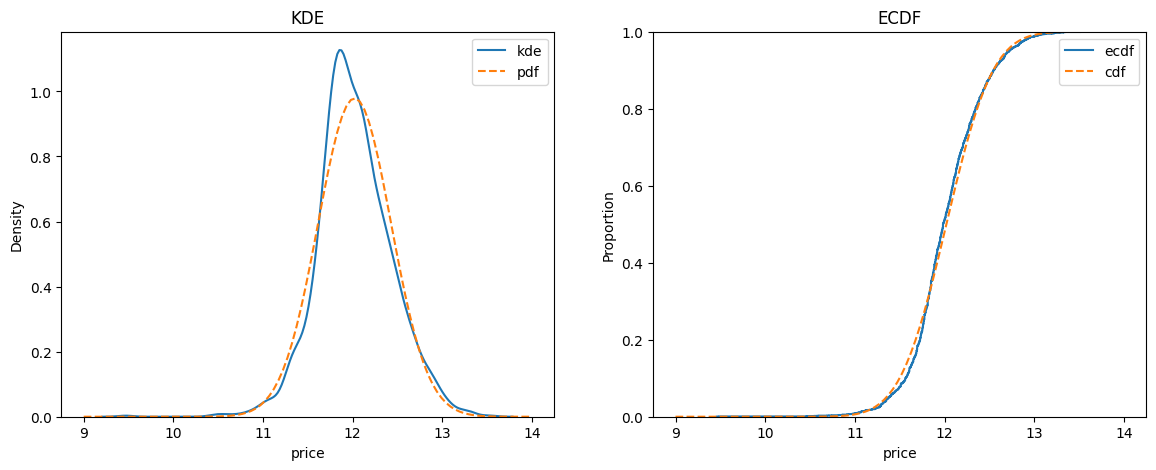

In [10]:
import scipy as sp 
mu_hat = np.mean(y)
sigma_hat = np.sqrt( np.mean( (y-mu_hat)**2 ) )

grid = np.linspace(9,14,100)

pdf = sp.stats.norm.pdf(grid,loc=mu_hat,scale=sigma_hat)
cdf = sp.stats.norm.cdf(grid,loc=mu_hat,scale=sigma_hat)

fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.kdeplot(x=y,ax=axes[0],label='kde')
sns.lineplot(x=grid,y=pdf,ax=axes[0],label='pdf',linestyle='--')
axes[0].set_title('KDE')
sns.ecdfplot(x=y,ax=axes[1],label='ecdf')
sns.lineplot(x=grid,y=cdf,ax=axes[1],label='cdf',linestyle='--')
axes[1].set_title('ECDF')
plt.show()

The ECDF matches the theoretical curve very closely—the two lines almost sit directly on top of each other. In the PDF plot, the data show a slightly sharper peak and a small tilt to the left, but overall they still look roughly bell-shaped, and the tails drop off quickly. If we wanted a more formal check, we could use a Quantile–Quantile (Q–Q) plot or run a Kolmogorov–Smirnov test, but that’s more than we need right now.

Next, let’s examine the sampling distribution of sample 𝜇 and sample σ.

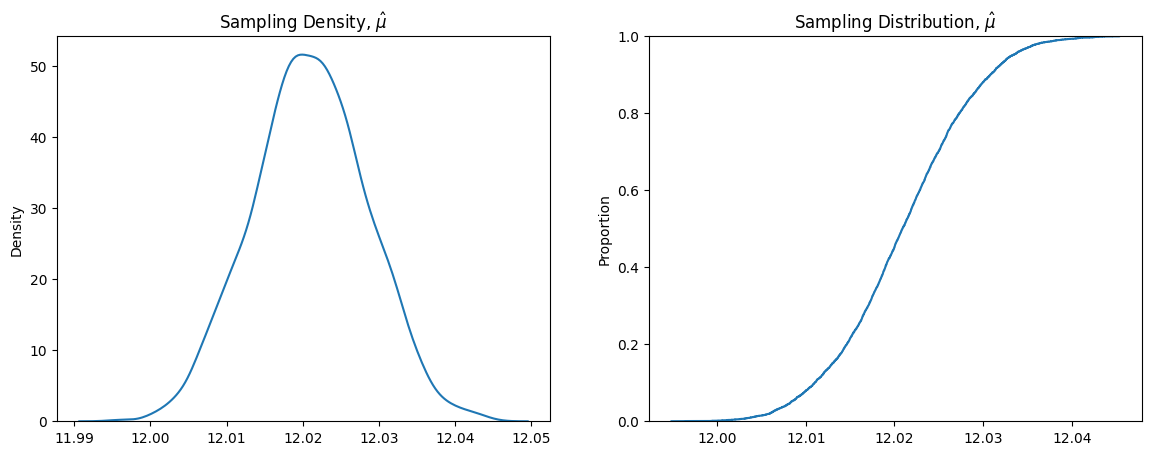

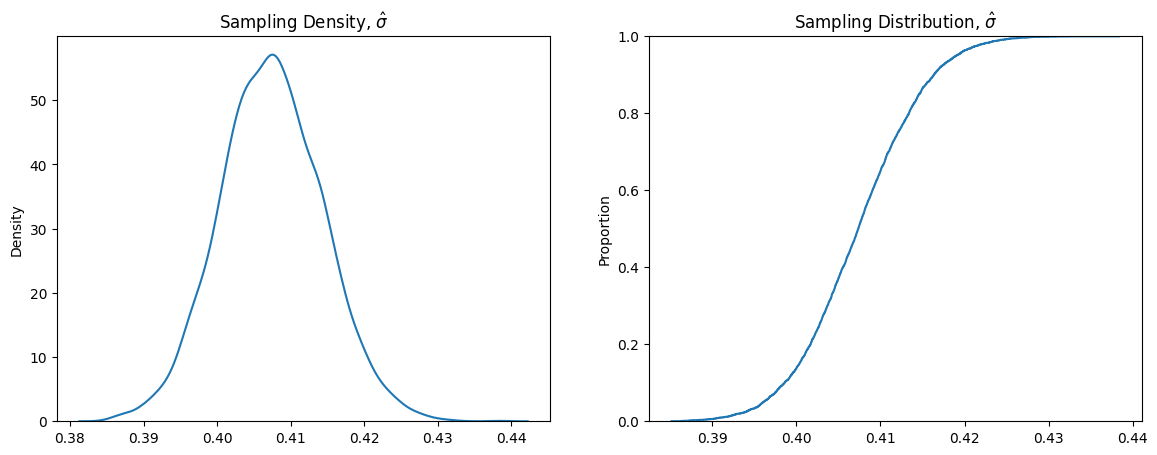

In [11]:
def mle(y):
    mu_hat = np.mean(y)
    sigma_hat = np.sqrt( np.mean( (y-mu_hat)**2 ) )
    return mu_hat, sigma_hat

# Bootstrapping:
S = 5000
sample = [ mle(y.sample(frac=1.0,replace=True)) for s in range(S)]

# Sampling distributions:
mu_hat_sample = [ row[0] for row in sample]
fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.kdeplot(x=mu_hat_sample,ax=axes[0],label='kde')
axes[0].set_title('Sampling Density, $\\hat{\\mu}$')
sns.ecdfplot(x=mu_hat_sample,ax=axes[1],label='ecdf')
axes[1].set_title('Sampling Distribution, $\\hat{\\mu}$')
plt.show()

sigma_hat_samples = [ row[1] for row in sample]
fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.kdeplot(x=sigma_hat_samples,ax=axes[0],label='kde')
axes[0].set_title('Sampling Density, $\\hat{\\sigma}$')
sns.ecdfplot(x=sigma_hat_samples,ax=axes[1],label='ecdf')
axes[1].set_title('Sampling Distribution, $\\hat{\\sigma}$')
plt.show()

The provided graphs illustrate key steps in analyzing and quantifying uncertainty for a set of housing price data. The initial histogram reveals the distribution of the log-transformed price, showing it is unimodal and approximately symmetric, clustering around a mode of 12.01. This transformation helps achieve a more normal shape, which is often desirable for statistical analysis. 

Subsequently, the data's uncertainty is simulated using the Bootstrap method, where the original data is resampled many times to create a Sampling Distribution for a statistic. The resulting Kernel Density Estimate (KDE) and Empirical Cumulative Distribution Function (ECDF) graphs quantify the precision for two key statistics: the mean ($\hat{\mu}$) and the standard deviation ($\hat{\sigma}$). The sampling distribution for the mean price ($\hat{\mu}$) is tightly centered around 12.02, while the sampling distribution for the standard deviation ($\hat{\sigma}$) is centered around 0.41, both demonstrating a relatively narrow spread and thus a high degree of precision in their estimates .

## 10.
- Open the METABRIC data. Make a KDE of 'Overall Survival (Months)'.
- Let survival time, $T$ be distributed exponentially with parameter $\lambda$. Then its distribution is
$$
F(t) = 1 - e^{-\lambda t} = p[T\le t].
$$
- Derive the density for this distribution.
- Write out the likelihood.
- Maximize the likelihood with respect to $\lambda$. What is the MLE, $\hat{\lambda}$?
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of $\hat{\lambda}$.

## 11.
- Open the Ames house price data. Make a histogram of 'TotRms.AbvGrd', or total rooms above ground.
- We're going to model this using the Poisson Distribution. The probability that $y_i = k$ is given by
$$
pr[y_i = k ] = \frac{ \lambda^k e^{-\lambda} }{k!}
$$
- Write out the likelihood.
- Maximize the likelihood. What is the MLE? (Hint: The sample mean. As usual.)
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameter.

## 12.
- Open the METABRIC data. Make a histogram of 'Mutation Count' with around 50 bins. Let $Y$ be the mutation count the random variable, and $y_i$ the mutation count for patient $i$.
- We're going to model this using the Poisson Distribution. The probability that $y_i = k$ is given by
$$
pr[y_i = k ] = \frac{ \lambda^k e^{-\lambda} }{k!}
$$
- Write out the likelihood.
- Maximize the likelihood. What is the MLE? (Hint: The sample mean. As usual.)
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameter.